# Importing Library and Data Collecting

In [2]:
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('House_Price_dataset.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


# EDA and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
num_col = df.select_dtypes(include='number').columns
len(df.select_dtypes(include='number').columns)

8

In [6]:
cat_col = df.select_dtypes(exclude='number').columns
len(df.select_dtypes(exclude='number').columns)

12

In [7]:
for i in cat_col:
    print(f"Kolom '{i}':")
    print(f"Jumlah kategori unik: {df[i].nunique()}")
    print(df[i].value_counts())
    print('==========')

Kolom 'page_url':
Jumlah kategori unik: 168446
https://www.zameen.com/Property/g_10_g_10_2_ground_floor_corner_apartment_with_green_lawn_for_sale-237062-3325-1.html                                                             1
https://www.zameen.com/Property/d_h_a_dha_phase_6_500_yard_beautifull_bunglow_for_rent_in_prime_location-17003540-1483-4.html                                                     1
https://www.zameen.com/Property/d_h_a_dha_phase_6_1000_yard_must_prime_location_in_dha_phase_6_with_pool_and_basement-17003653-1483-4.html                                        1
https://www.zameen.com/Property/dha_valley_dha_homes_here_is_a_good_opportunity_to_live_in_a_well_built_house-17003693-3226-1.html                                                1
https://www.zameen.com/Property/dha_valley_dha_homes_here_is_a_good_opportunity_to_live_in_a_well_built_house-17003703-3226-1.html                                                1
                                                     

In [8]:
df = df.drop(columns=['page_url','agent'])

In [ ]:
for i in cat_col:
    grouped_data = [df[df[i] == cat]['price']for cat in df[i].unique()]
    stat, p_val = kruskal(*grouped_data)
    print(f'kolom {i}')
    print(f"Statistik Kruskal-Wallis: {stat:.2f}")
    print(f"P-Value: {p_val:.3f}")    

hapus kolom: page_url, location, area, date_added, agency, agent

priotitas: page_url and agent

In [10]:
cor = df.corr(method='spearman')
cor

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
property_id,1.000000,-0.001317,-0.038656,0.019365,0.008172,-0.140989,-0.066527,0.007092
location_id,-0.001317,1.000000,0.000859,-0.246165,-0.131007,-0.093558,-0.121695,0.099102
price,-0.038656,0.000859,1.000000,-0.182006,0.151112,0.385428,0.492805,0.078051
latitude,0.019365,-0.246165,-0.182006,1.000000,0.538524,0.010425,0.010611,-0.013042
longitude,0.008172,-0.131007,0.151112,0.538524,1.000000,0.161115,0.168356,-0.049326
baths,-0.140989,-0.093558,0.385428,0.010425,0.161115,1.000000,0.736991,0.037936
bedrooms,-0.066527,-0.121695,0.492805,0.010611,0.168356,0.736991,1.000000,0.052436
Area Size,0.007092,0.099102,0.078051,-0.013042,-0.049326,0.037936,0.052436,1.000000


In [11]:
df = df.drop(columns=['property_id','location_id'])

In [12]:
df.shape

(168446, 16)

In [13]:
df.isna().sum()

property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [14]:
df = df.drop(columns=['agency'])

In [15]:
df.isna().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
Area Type        0
Area Size        0
Area Category    0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
fig, ax = plt.subplots((len(num_col)//2)+(len(num_col) % 2), 2, figsize=(10,8))

for axis, col in zip(ax.flatten(), list(num_col)):
    axis.boxplot(df[col].dropna())
    axis.set_title(f'Boxplot Kolom {col}')

if len(num_col) % 2 != 0:
    ax.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
def outlier_remover(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 0.0000001*IQR
    upper_bound = Q3 + 0.0000001*IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [19]:
num_col = df.select_dtypes(include='number').columns
for i in num_col.tolist():
    df2 = outlier_remover(df, i)

print(f"Sebelum penghapusan outlier {df.shape} setelah {df2.shape}")

Sebelum penghapusan outlier (147957, 15) setelah (75677, 15)


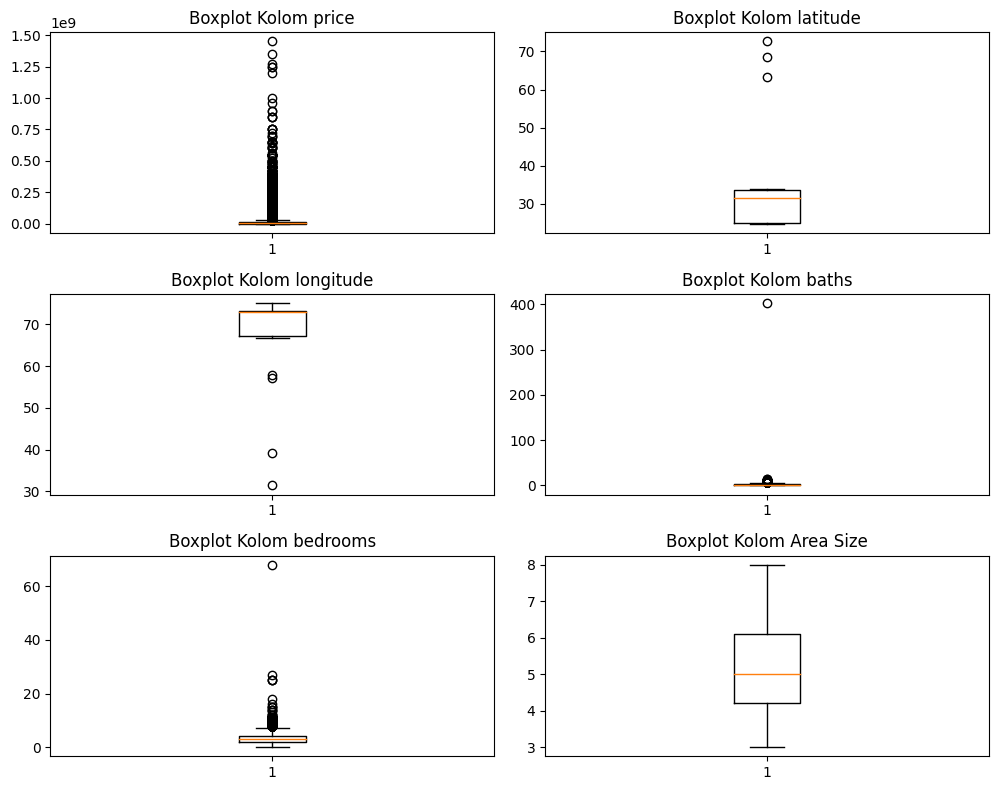

In [20]:
fig, ax = plt.subplots((len(num_col)//2)+(len(num_col) % 2), 2, figsize=(10,8))

for axis, col in zip(ax.flatten(), list(num_col)):
    axis.boxplot(df2[col].dropna())
    axis.set_title(f'Boxplot Kolom {col}')

if len(num_col) % 2 != 0:
    ax.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
cat_col

Index(['page_url', 'property_type', 'location', 'city', 'province_name',
       'area', 'purpose', 'date_added', 'agency', 'agent', 'Area Type',
       'Area Category'],
      dtype='object')

target encoding: location, area, Area Category

one hot: property_type, city, province_name,

label: purpose,Area Type

In [22]:
tar_enc = ['location', 'area', 'Area Category']
for i in tar_enc:
    mean_encoded = df2.groupby(i)['price'].mean()
    df2[i] = df2[i].map(mean_encoded)

C:\Users\aryag\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
df2.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,Flat,10000000,8.369724e+06,Islamabad,Islamabad Capital,33.679890,73.012640,2,7.650254e+06,For Sale,2,02-04-2019,Marla,4.0,7.264250e+06
1,Flat,6900000,4.377435e+06,Islamabad,Islamabad Capital,33.700993,72.971492,3,7.632806e+06,For Sale,3,05-04-2019,Marla,5.6,1.055357e+07
2,House,16500000,5.112174e+06,Islamabad,Islamabad Capital,33.631486,72.926559,6,1.339884e+07,For Sale,5,07-17-2019,Marla,8.0,1.055357e+07
4,House,7000000,1.691270e+07,Islamabad,Islamabad Capital,33.492591,73.301339,3,1.339884e+07,For Sale,3,07-10-2019,Marla,8.0,1.055357e+07
7,Flat,7800000,4.377435e+06,Islamabad,Islamabad Capital,33.698244,72.984238,2,7.785060e+06,For Sale,2,05-05-2019,Marla,6.2,1.055357e+07


In [24]:
df2 = pd.get_dummies(df2, columns=['property_type', 'city', 'province_name'], drop_first=True)
df2.head()

,price,location,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
0,10000000,8.369724e+06,33.679890,73.012640,2,7.650254e+06,For Sale,2,02-04-2019,Marla,4.0,7.264250e+06,1,0,0,0,0,0,1,0,0,0,0,0
1,6900000,4.377435e+06,33.700993,72.971492,3,7.632806e+06,For Sale,3,05-04-2019,Marla,5.6,1.055357e+07,1,0,0,0,0,0,1,0,0,0,0,0
2,16500000,5.112174e+06,33.631486,72.926559,6,1.339884e+07,For Sale,5,07-17-2019,Marla,8.0,1.055357e+07,0,1,0,0,0,0,1,0,0,0,0,0
4,7000000,1.691270e+07,33.492591,73.301339,3,1.339884e+07,For Sale,3,07-10-2019,Marla,8.0,1.055357e+07,0,1,0,0,0,0,1,0,0,0,0,0
7,7800000,4.377435e+06,33.698244,72.984238,2,7.785060e+06,For Sale,2,05-05-2019,Marla,6.2,1.055357e+07,1,0,0,0,0,0,1,0,0,0,0,0


In [25]:
le = LabelEncoder()

df2['purpose'] = le.fit_transform(df2['purpose'])
df2['Area Type'] = le.fit_transform(df2['Area Type'])
df2.head()

,price,location,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
0,10000000,8.369724e+06,33.679890,73.012640,2,7.650254e+06,1,2,02-04-2019,1,4.0,7.264250e+06,1,0,0,0,0,0,1,0,0,0,0,0
1,6900000,4.377435e+06,33.700993,72.971492,3,7.632806e+06,1,3,05-04-2019,1,5.6,1.055357e+07,1,0,0,0,0,0,1,0,0,0,0,0
2,16500000,5.112174e+06,33.631486,72.926559,6,1.339884e+07,1,5,07-17-2019,1,8.0,1.055357e+07,0,1,0,0,0,0,1,0,0,0,0,0
4,7000000,1.691270e+07,33.492591,73.301339,3,1.339884e+07,1,3,07-10-2019,1,8.0,1.055357e+07,0,1,0,0,0,0,1,0,0,0,0,0
7,7800000,4.377435e+06,33.698244,72.984238,2,7.785060e+06,1,2,05-05-2019,1,6.2,1.055357e+07,1,0,0,0,0,0,1,0,0,0,0,0


In [26]:
df2 = df2.drop(columns='date_added')

In [27]:
x = df2.drop(columns=['price'])
y = df2['price']

In [28]:
df_nscal = x.copy()
df_mm = x.copy()
df_ss = x.copy()
df_rb = x.copy()

In [29]:
x.head()

,location,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
0,8.369724e+06,33.679890,73.012640,2,7.650254e+06,1,2,1,4.0,7.264250e+06,1,0,0,0,0,0,1,0,0,0,0,0
1,4.377435e+06,33.700993,72.971492,3,7.632806e+06,1,3,1,5.6,1.055357e+07,1,0,0,0,0,0,1,0,0,0,0,0
2,5.112174e+06,33.631486,72.926559,6,1.339884e+07,1,5,1,8.0,1.055357e+07,0,1,0,0,0,0,1,0,0,0,0,0
4,1.691270e+07,33.492591,73.301339,3,1.339884e+07,1,3,1,8.0,1.055357e+07,0,1,0,0,0,0,1,0,0,0,0,0
7,4.377435e+06,33.698244,72.984238,2,7.785060e+06,1,2,1,6.2,1.055357e+07,1,0,0,0,0,0,1,0,0,0,0,0


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75677 entries, 0 to 168444
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location                     75677 non-null  float64
 1   latitude                     75677 non-null  float64
 2   longitude                    75677 non-null  float64
 3   baths                        75677 non-null  int64  
 4   area                         75677 non-null  float64
 5   purpose                      75677 non-null  int32  
 6   bedrooms                     75677 non-null  int64  
 7   Area Type                    75677 non-null  int32  
 8   Area Size                    75677 non-null  float64
 9   Area Category                75677 non-null  float64
 10  property_type_Flat           75677 non-null  uint8  
 11  property_type_House          75677 non-null  uint8  
 12  property_type_Lower Portion  75677 non-null  uint8  
 13  property_type_P

one hot: property_type, city, province_name,

label: purpose,Area Type

In [31]:
mm = MinMaxScaler()
ss = StandardScaler()
rb = RobustScaler()
numeric_cols = ['location'	,'latitude', 'longitude',	'baths',	'area','bedrooms',	'Area Size'	,'Area Category'	]
cat_cols = [col for col in df2.columns if col not in numeric_cols]
df_mm = pd.DataFrame(mm.fit_transform(x), columns=x.columns)
df_ss = pd.DataFrame(ss.fit_transform(x[numeric_cols]), columns=numeric_cols)
df_ss = pd.concat([df_ss, df2[cat_cols].reset_index(drop=True)], axis=1)
df_ss = df_ss.drop(columns=['price'])
df_rb = pd.DataFrame(rb.fit_transform(x[numeric_cols]), columns=numeric_cols)
df_rb = pd.concat([df_rb, df2[cat_cols].reset_index(drop=True)], axis=1)
df_rb = df_rb.drop(columns=['price'])

In [32]:
df_mm.describe()

,location,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
count,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000
mean,0.016974,0.098948,0.904345,0.006021,0.011677,0.762570,0.040452,0.984275,0.452899,0.020348,0.296352,0.583955,0.047095,0.002127,0.002339,0.063982,0.183279,0.408129,0.215349,0.137928,0.408592,0.408129
std,0.019136,0.081147,0.073024,0.005835,0.020413,0.425511,0.024819,0.124409,0.292931,0.101447,0.456651,0.492904,0.211843,0.046076,0.048306,0.244723,0.386898,0.491491,0.411067,0.344827,0.491577,0.491491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010461,0.003891,0.817338,0.002481,0.007619,1.000000,0.029412,1.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.014478,0.139464,0.952465,0.004963,0.009084,1.000000,0.044118,1.000000,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.018207,0.183896,0.955883,0.007444,0.011484,1.000000,0.058824,1.000000,0.620000,0.020470,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'location'	,'latitude', 'longitude',	'baths',	'area','bedrooms',	'Area Size'	,'Area Category'

In [33]:
df_ss.describe()

,location,latitude,longitude,baths,area,bedrooms,Area Size,Area Category,purpose,Area Type,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
count,7.567700e+04,7.567700e+04,7.567700e+04,7.567700e+04,7.567700e+04,7.567700e+04,7.567700e+04,7.567700e+04,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000
mean,1.820556e-16,-6.760188e-17,-1.258897e-15,2.403623e-17,2.384844e-17,-3.455207e-17,-3.751905e-16,-1.184911e-16,0.762570,0.984275,0.296352,0.583955,0.047095,0.002127,0.002339,0.063982,0.183279,0.408129,0.215349,0.137928,0.408592,0.408129
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.425511,0.124409,0.456651,0.492904,0.211843,0.046076,0.048306,0.244723,0.386898,0.491491,0.411067,0.344827,0.491577,0.491491
min,-8.870484e-01,-1.219365e+00,-1.238438e+01,-1.031816e+00,-5.720397e-01,-1.629941e+00,-1.546103e+00,-2.005785e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.403634e-01,-1.171419e+00,-1.191506e+00,-6.065642e-01,-1.987715e-01,-4.448612e-01,-7.267922e-01,-2.005785e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.304596e-01,4.993025e-01,6.589656e-01,-1.813124e-01,-1.270210e-01,1.476789e-01,-1.805847e-01,-2.005785e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.441456e-02,1.046853e+00,7.057785e-01,2.439395e-01,-9.478127e-03,7.402190e-01,5.704506e-01,1.199419e-03,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.137068e+01,1.110398e+01,1.309925e+00,1.703447e+02,4.841651e+01,3.866279e+01,1.867693e+00,9.656807e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df_rb.describe()

,location,latitude,longitude,baths,area,bedrooms,Area Size,Area Category,purpose,Area Type,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
count,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000,75677.000000
mean,0.322299,-0.225086,-0.347320,0.213182,0.671027,-0.124615,0.139207,0.994056,0.762570,0.984275,0.296352,0.583955,0.047095,0.002127,0.002339,0.063982,0.183279,0.408129,0.215349,0.137928,0.408592,0.408129
std,2.470507,0.450804,0.527073,1.175782,5.282841,0.843830,0.770871,4.955977,0.425511,0.124409,0.456651,0.492904,0.211843,0.046076,0.048306,0.244723,0.386898,0.491491,0.411067,0.344827,0.491577,0.491491
min,-1.869146,-0.774778,-6.874746,-1.000000,-2.350947,-1.500000,-1.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.518565,-0.753164,-0.975326,-0.500000,-0.379044,-0.500000,-0.421053,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481435,0.246836,0.024674,0.500000,0.620956,0.500000,0.578947,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,127.233075,4.780604,0.343101,200.500000,256.446066,32.500000,1.578947,48.852649,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [35]:
df_nscal.shape

(75677, 22)

In [36]:
df_mm.shape

(75677, 22)

In [37]:
df_ss.shape

(75677, 22)

In [38]:
df_rb.shape

(75677, 22)

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_ns = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_nscal, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_ns[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_ns.items():
    print(f"{model}: {scores}")

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_mm = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_mm, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_mm[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_mm.items():
    print(f"{model}: {scores}")

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_ss = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_ss, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_ss[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_ss.items():
    print(f"{model}: {scores}")

In [42]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_rb = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_rb, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_rb[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_rb.items():
    print(f"{model}: {scores}")

Regresi = [-1.24787889e+15 -3.60999959e+14 -4.93246939e+14 -3.60794541e+14
 -3.61200024e+14 -2.79210148e+14 -4.89476751e+14 -5.01382712e+14
 -5.07435598e+14 -7.91327502e+14 -2.74795253e+14 -8.87723497e+14
 -6.88089894e+14 -2.99162820e+14 -3.09608142e+14 -4.18772301e+14
 -3.73538551e+14 -4.63899606e+14 -3.34070827e+14 -5.55309260e+14
 -2.71839795e+14 -1.69470341e+14 -3.16348105e+14 -4.75449993e+14
 -4.07671955e+14]
KNN = [-8.71332020e+14 -3.21132461e+14 -4.10837468e+14 -2.41920639e+14
 -1.85064541e+14 -1.24132501e+14 -3.70865772e+14 -4.26116980e+14
 -3.59579045e+14 -7.30041817e+14 -3.83660513e+14 -4.04593649e+14
 -7.22824887e+14 -1.54427137e+14 -2.36740491e+14 -4.14007061e+14
 -3.81512687e+14 -3.34748560e+14 -1.35358798e+14 -5.91815787e+14
 -1.92627416e+14 -1.34084393e+14 -1.13275429e+14 -4.27194348e+14
 -1.76615368e+14]
SVM = [-2.29815758e+15 -7.81449455e+14 -1.04969473e+15 -7.62270260e+14
 -6.86422392e+14 -7.83242681e+14 -9.43165612e+14 -9.52843566e+14
 -1.10070097e+15 -1.61432006e+15

In [ ]:
df_scores = abs(pd.DataFrame.from_dict(model_scores_ns , orient='index').transpose())
df_scores.to_csv('2model_scores_ns.csv', index=False)

In [ ]:
df_scores2 = abs(pd.DataFrame.from_dict(model_scores_mm , orient='index').transpose())
df_scores2.to_csv('2model_scores_mm.csv', index=False)

In [ ]:
df_scores3 = abs(pd.DataFrame.from_dict(model_scores_ss , orient='index').transpose())
df_scores3.to_csv('2model_scores_ss.csv', index=False)

In [46]:
df_scores4 = abs(pd.DataFrame.from_dict(model_scores_rb , orient='index').transpose())
df_scores4.to_csv('2model_scores_rb.csv', index=False)